In [130]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from baselines import plurality


In [92]:
df = pd.read_csv('../../data/annotations/clean/annotations.tsv', sep='\t')
df.index=df.rev_id

### Explore ambivalent `is_harassment_or_attack` labels

It is incorrect to give a revision a label an attack label and a not attack label. Lets see how often this occurs and who makes this error.

In [17]:
df['is_harassment_or_attack'].value_counts(dropna=False)

not_attack                                            1029013
recipient                                              135358
other                                                   34796
third_party                                             29702
recipient\nthird_party                                   8988
other\nnot_attack                                        8300
recipient\nnot_attack                                    6326
quoting                                                  5733
recipient\nthird_party\nquoting\nother\nnot_attack       5510
recipient\nother                                         3939
recipient\nthird_party\nnot_attack                       2209
recipient\nthird_party\nquoting\nother                   2182
third_party\nother                                       1669
recipient\nthird_party\nother                            1649
quoting\nnot_attack                                      1427
recipient\nthird_party\nquoting                          1385
third_pa

In [27]:
def attack_and_not_attack(s):
    return 'not_attack' in s and s!= 'not_attack'

In [44]:
df[df['is_harassment_or_attack'].apply(attack_and_not_attack)]['_worker_id'].value_counts().head()

33939537    841
35210143    785
9232361     707
13318404    674
31317272    666
Name: _worker_id, dtype: int64

Ok, there are a few users who do this a lot.

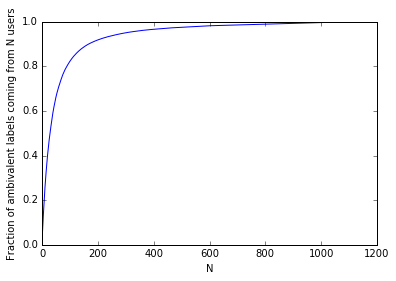

In [43]:
y = df[df['is_harassment_or_attack'].apply(attack_and_not_attack)]['_worker_id'].value_counts().cumsum()
y = y/y.iloc[-1]
x = list(range(len(y)))
plt.plot(x, y)
plt.xlabel('N')
plt.ylabel('Fraction of ambivalent labels coming from N users')

It looks like 90% of ambivalent labels come from 200 users. We might consider dropping all annotations from these users. We can also check what fraction of a users labels are ambivalent and select a threshold based on that.

In [136]:
counts = df[df['is_harassment_or_attack'].apply(attack_and_not_attack)]['_worker_id'].value_counts()
fraction = (counts / df['_worker_id'].value_counts()).dropna()
d_ambi = pd.DataFrame({'counts': counts, 'fraction':fraction}).sort_values('fraction', ascending=False)
d_ambi['N'] = 1
d_ambi = d_ambi.groupby('fraction', as_index = False).sum()
d_ambi = d_ambi.sort_values('fraction', ascending = False)
d_ambi['cum_counts'] = d_ambi['counts'].cumsum() / d_ambi['counts'].sum()
d_ambi['cum_N'] = d_ambi['N'].cumsum() / d_ambi['N'].sum()
d_ambi['fraction'] = 1 -d_ambi['fraction']

In [137]:
d_ambi.head()

,fraction,counts,N,cum_counts,cum_N
838,0.000000,1953,7,0.069559,0.006233
837,0.002801,356,1,0.082238,0.007124
836,0.002817,354,1,0.094846,0.008014
835,0.002959,674,1,0.118852,0.008905
834,0.003891,256,1,0.127970,0.009795


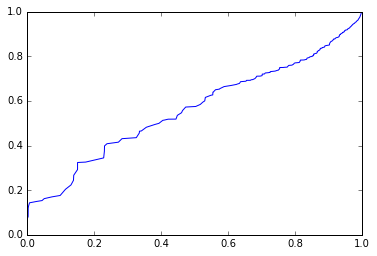

In [142]:
plt.plot(d_ambi['fraction'], d_ambi['cum_counts'])

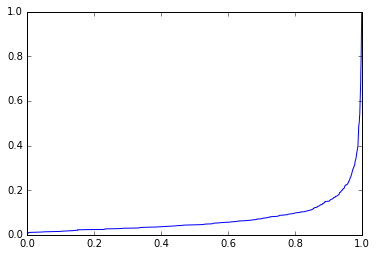

In [143]:
plt.plot(d_ambi['fraction'], d_ambi['cum_N'])

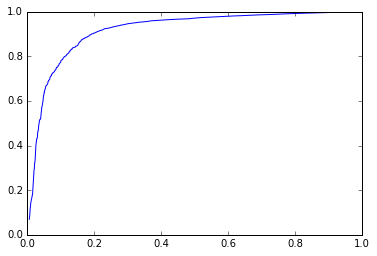

In [144]:
plt.plot(d_ambi['cum_N'], d_ambi['cum_counts'])

Consider dropping all annotations from users who score 1:5 comments as ambivalent.

### Explore consistently deviant users

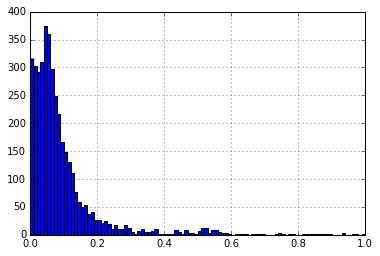

In [146]:
col = 'recipient'
pl = plurality(df[col])
df['plurality'] = pl
df['deviant'] = df[col] != df['plurality']
deviance_scores = df.groupby('_worker_id')['deviant'].mean()
deviance_scores.sort_values(ascending = False).hist(bins=100)

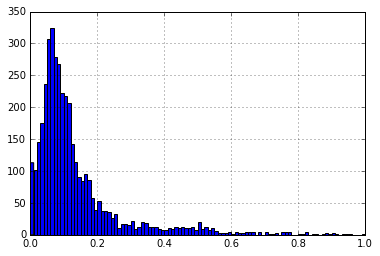

In [147]:
col = 'attack'
pl = plurality(df[col])
df['plurality'] = pl
df['deviant'] = df[col] != df['plurality']
deviance_scores = df.groupby('_worker_id')['deviant'].mean()
deviance_scores.sort_values(ascending = False).hist(bins=100)

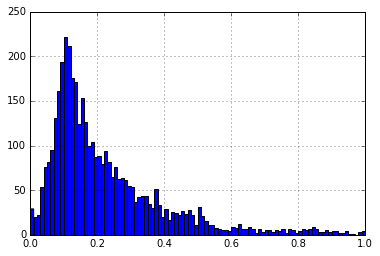

In [148]:
col = 'aggression'
pl = plurality(df[col])
df['plurality'] = pl
df['deviant'] = df[col] != df['plurality']
deviance_scores = df.groupby('_worker_id')['deviant'].mean()
deviance_scores.sort_values(ascending = False).hist(bins=100)